# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

## 1. Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe

In [18]:
import pandas as pd
from pandas.io import sql
import sqlite3
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.preprocessing import scale

In [2]:

conn = sqlite3.connect('../../assets/datasets/adult.sqlite')
c = conn.cursor()
conn.commit()
c.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()



[(u'SELECT * FROM adult;',), (u'adult',)]

In [3]:
df = pd.read_sql('select * from adult;',conn)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1 Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [4]:
df.isnull()
df.shape

(48842, 15)

In [5]:
df1 = df.dropna()
df1.shape

(45222, 15)

## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

In [17]:
df1.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,sclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False


In [15]:
df1.loc[:,"salary"] = df1.loc[:,"salary"].astype(str)
df1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
sclass              bool
dtype: object

In [89]:
df1["sclass"] = df1["salary"].str.contains(">50K")
#df1["sclass"]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### 3 Features

The dataset contains many features.

- Are they numerical?
- Are they categorical?

> Some and some

### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

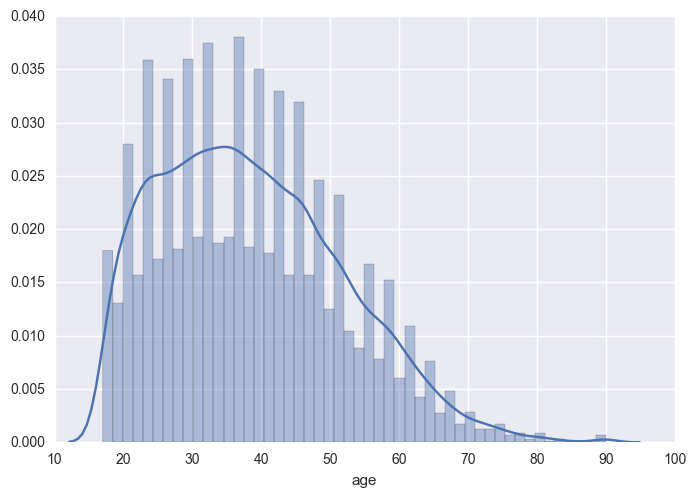

In [44]:
sns.distplot(df1["age"],hist=True)
plt.show()

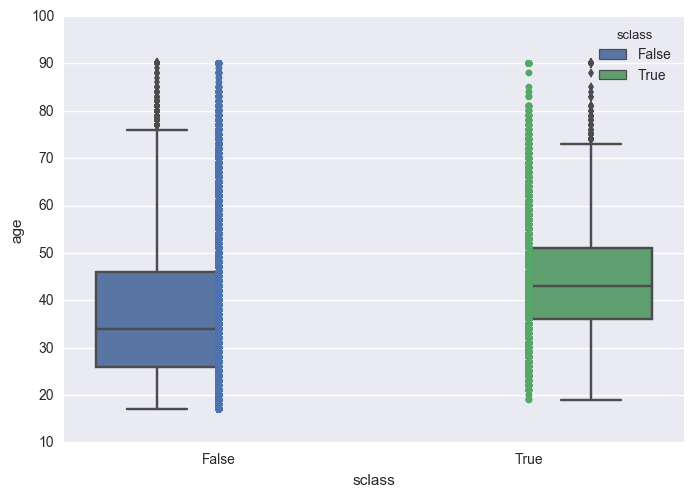

In [47]:
# sns.boxplot(df1["sclass"],df1["age"],hue=df1["sclass"])
# plt.show()

In [48]:
# sns.swarmplot(df1["sclass"],df1["age"])
# plt.show()

The only thing that is clearly visible is that there are many more young people in the low income class.

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

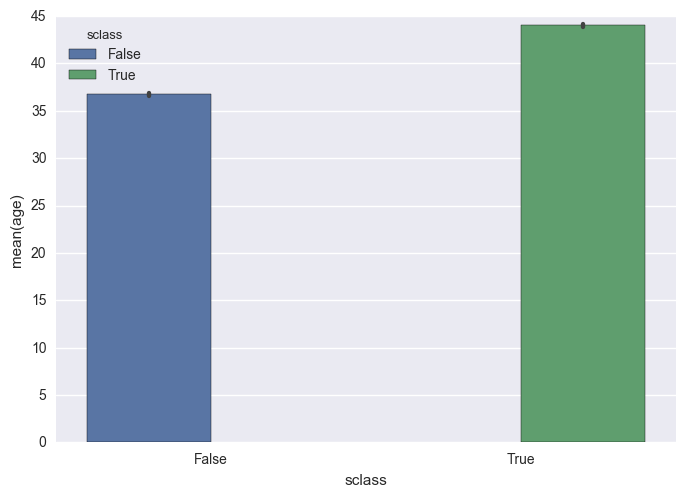

In [52]:
sns.barplot(df1["sclass"],df1["age"],hue=df1["sclass"])
plt.show()

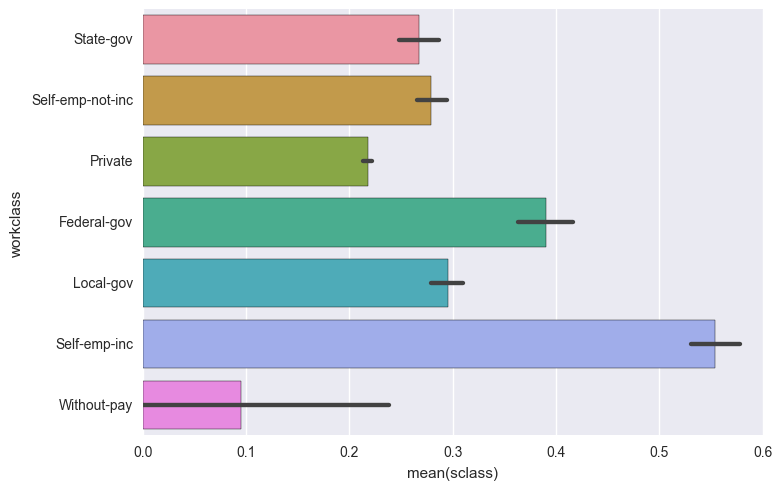

In [58]:
sns.barplot(df1["sclass"],df1["workclass"])
plt.show()

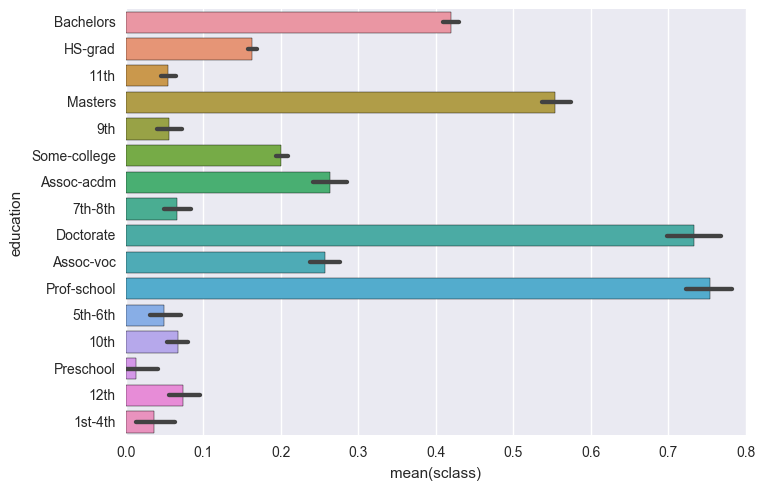

In [87]:
sns.barplot(y = df1["education"],x = df1["sclass"])
plt.show()

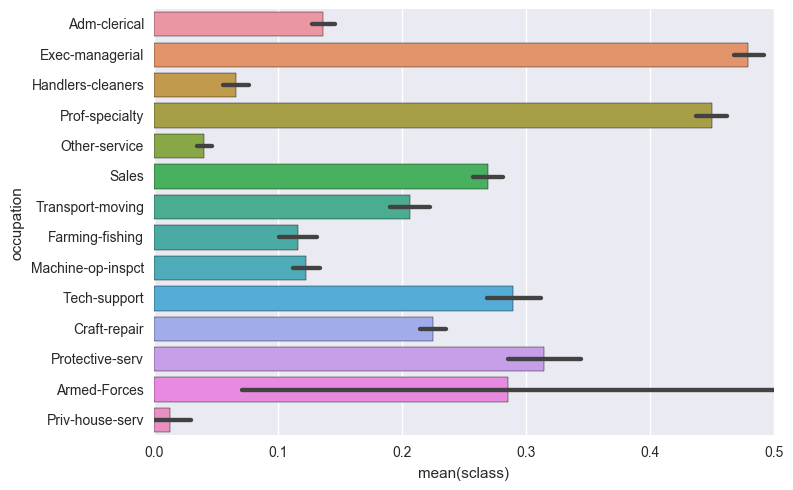

In [70]:
sns.barplot(y = df1["occupation"], x = df1["sclass"])
plt.show()

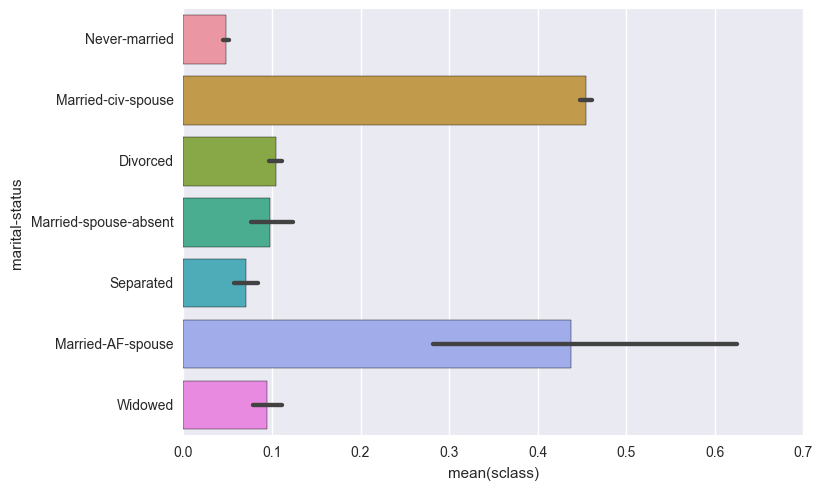

In [74]:
sns.barplot(y = df1["marital-status"], x = df1["sclass"])
plt.show()

In [88]:
sns.barplot(y=df1["relationship"],x = df1["sclass"])
sns.factorplot(x=df1["sclass"], y=df1["relationship"], kind="bar");
plt.show()

TypeError: object of type 'NoneType' has no len()

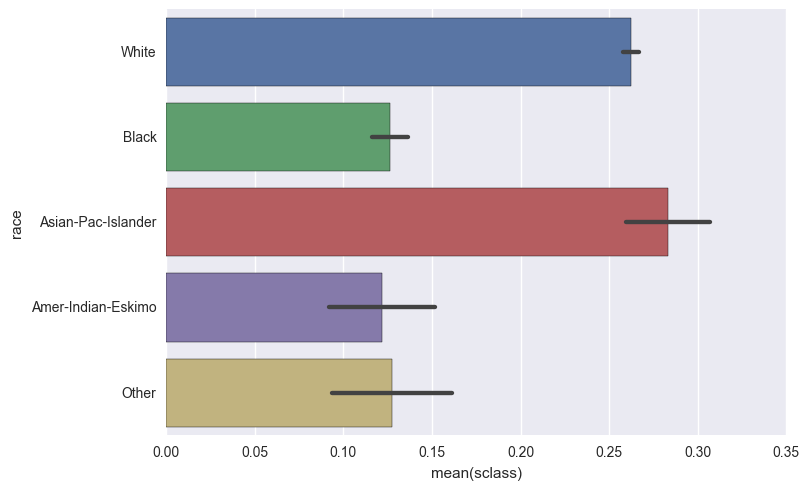

In [80]:
sns.barplot(y = df1["race"], x = df1["sclass"])
plt.show()

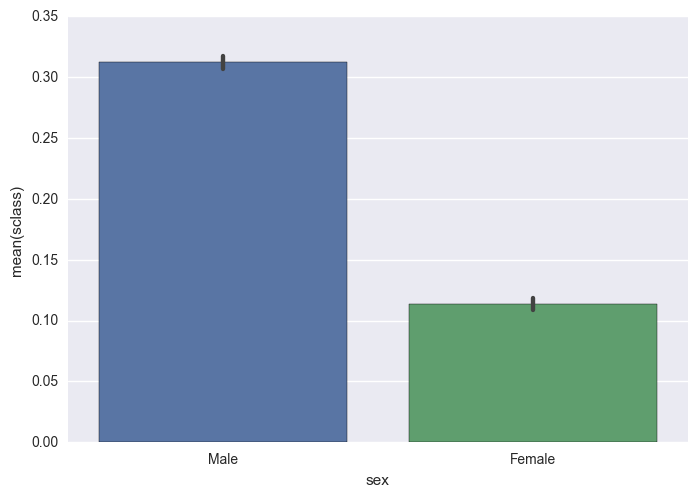

In [82]:
sns.barplot(x = df1["sex"], y = df1["sclass"])
plt.show()

In [41]:
df1.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sclass
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992,0.237040
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679,-0.007264
education-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206,0.332800
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880,0.221034
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195,0.148687
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000,0.227199
sclass,0.237040,-0.007264,0.332800,0.221034,0.148687,0.227199,1.000000


### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into numbers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this. Please feel free to choose whichever you prefer.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discuss within your team about pros/cons of each scaler.

## 6. Combine Features

Combine the dummy features and the scaled feature into a single dataset called `X`.

Rename the target variable `y`.

What's the accuracy score of a benchmark model? What's the simplest model you could build?

## 7. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with other teams
